In [9]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

In [10]:
df = pd.read_csv("data/train.csv")
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [11]:
# drop 'id', 'breath_id', and 'pressure' from the predictors
X = df[['R', 'C', 'time_step', 'u_in', 'u_out']]
y = df['pressure']

## Split the data

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the linear regression model 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model performance

In [14]:
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse  = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse  = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE) Score:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 3.9483660838371923
Mean Squared Error (MSE): 40.53560335356405
Root Mean Squared Error (RMSE) Score: 6.366757679821343
R2 Score: 0.3837799307346067


## Prepare submission using the test dataset

In [15]:
df_test = pd.read_csv("data/test.csv")

# Prepare test features
X_test = df_test[['R', 'C', 'time_step', 'u_in', 'u_out']]

# Predict the pressure values for the test set
test_predictions = lr_model.predict(X_test)

# Create a submission
submission_df = pd.DataFrame({
    "id": df_test["id"],
    "pressure": test_predictions
})

# Save the submission file as CSV
submission_df.to_csv("simple_lr_submission.csv", index=False)

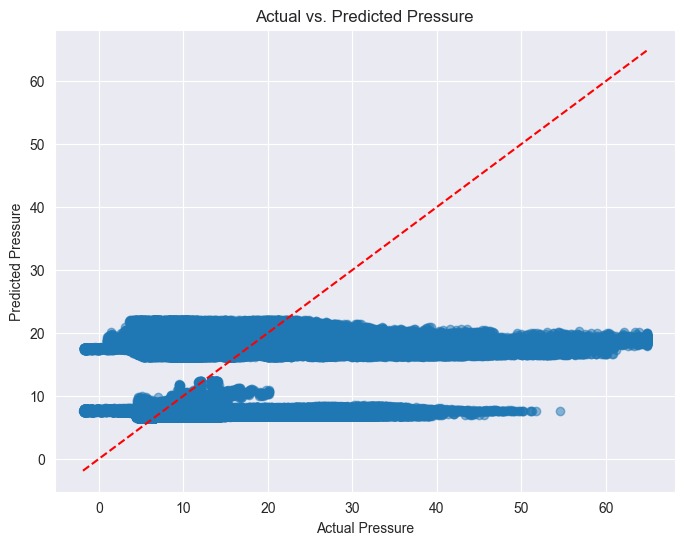

In [16]:
# Visualize the predicted vs actual pressure values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Pressure")
plt.ylabel("Predicted Pressure")
plt.title("Actual vs. Predicted Pressure")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()